In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

import timeseriesclient as tsc

In [2]:
tsc.globalsettings.environment.set_test()  # Work with test environment

# Create series data
The `timeseriesclient` work with Pandas Dataframe and Series object. Let's create a dummy series. 

In [3]:
index = pd.date_range('2016-01-03', freq='min', periods=100)
df_dummy = pd.DataFrame({'temp': 20. + np.random.randn(100)}, index=index)

In [4]:
df_dummy.head()

,temp
2016-01-03 00:00:00,20.884794
2016-01-03 00:01:00,21.818247
2016-01-03 00:02:00,21.431019
2016-01-03 00:03:00,19.151664
2016-01-03 00:04:00,19.178654


# Upload to the reservoir

First, authenticate yourself towards the reservoir.

In [6]:
auth_key = tsc.Authenticator('reservoir-integrationtest@4subsea.com')

Password: ········


Then initiate a client and use the authentication key.

In [7]:
client = tsc.TimeSeriesClient(auth_key)

Upload the DataFrame and store the response from the reservoir.

In [8]:
response = client.create(df_dummy)

In [9]:
response

{u'FileId': u'92ad7548-5c9e-47b6-a47f-e3bb84156ba9',
 u'TimeOfFirstSample': 1451779200000000000L,
 u'TimeOfLastSample': 1451785140000000000L,
 u'TimeSeriesId': u'1fb8fe17-027e-40df-b640-28d1b4af67ca'}

The reservoir assigns a unique id - TimeSeriesId. This id can be used to make requests towards the reservoir.

# Series information

Lets ask the reservoir about the newly created series data.

In [10]:
info = client.info(response['TimeSeriesId'])

In [11]:
info

{u'Created': u'2017-01-20T12:21:11.2710383+00:00',
 u'CreatedByEmail': u'reservoir-integrationtest@4subsea.com',
 u'LastModified': u'2017-01-20T12:21:11.2710383+00:00',
 u'LastModifiedByEmail': u'reservoir-integrationtest@4subsea.com',
 u'Metadata': [],
 u'TimeOfFirstSample': 1451779200000000000L,
 u'TimeOfLastSample': 1451785140000000000L,
 u'TimeSeriesId': u'1fb8fe17-027e-40df-b640-28d1b4af67ca'}

Note that the `TimeOfFirstSample` and `TimeOfLastSample` is stored as nanoseconds since POSIX epoch.

# Append more data

You can always append more data to the same timeseries entry. The data may even overlap, which in that case the most recent entry overwrites.

In [12]:
index = pd.date_range('2016-01-05', freq='min', periods=100)
df_dummy_append = pd.DataFrame({'temp': 23. + np.random.randn(100)}, index=index)

In [13]:
client.append(df_dummy_append, response['TimeSeriesId'])

{u'FileId': u'ecb8f09a-5fa7-4045-a28c-61d25cf7b695',
 u'TimeOfFirstSample': 1451952000000000000L,
 u'TimeOfLastSample': 1451957940000000000L,
 u'TimeSeriesId': u'1fb8fe17-027e-40df-b640-28d1b4af67ca'}

# Retrieve data back from the reservoir
You can download data from the reservoir. Data is presented as Pandas Series object. The index is by default kept as integers.

In [14]:
data = client.get(response['TimeSeriesId'])

In [15]:
data.head()

time
1451779200000000000    20.884794
1451779260000000000    21.818247
1451779320000000000    21.431019
1451779380000000000    19.151664
1451779440000000000    19.178654
Name: values, dtype: float64

But the index can be converted to date-time if desired.

In [16]:
data_datetime = client.get(response['TimeSeriesId'], convert_date=True)

In [17]:
data_datetime.head()

time
2016-01-03 00:00:00    20.884794
2016-01-03 00:01:00    21.818247
2016-01-03 00:02:00    21.431019
2016-01-03 00:03:00    19.151664
2016-01-03 00:04:00    19.178654
Name: values, dtype: float64

## Work with data

<IPython.core.display.Javascript object>


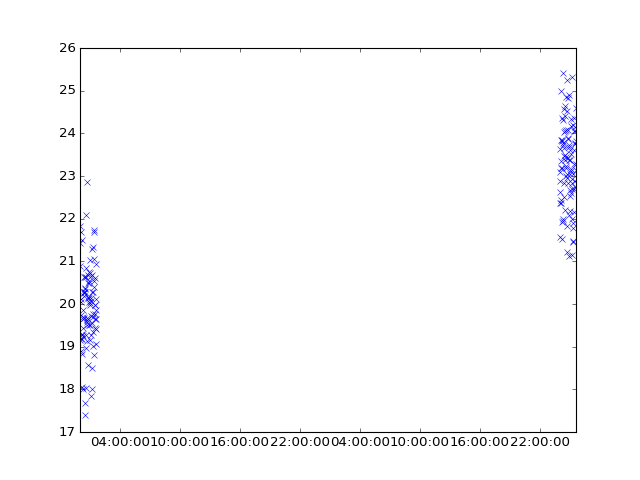

In [18]:
plt.figure()
plt.plot(data_datetime, 'x')

# Delete data in the reservoir

In [19]:
client.delete(response['TimeSeriesId'])